In [1]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pyplot as plt
import umap.umap_ as umap
from sklearn.datasets import make_blobs
import numpy as np
%matplotlib inline
import scipy

import time
import networkx as nx
import collections
from collections import defaultdict
import random
import pandas as pd
import statistics
import pickle
from seirsplus.models import *
import networkx as nx

import random

sns.set(style='white', context='poster', rc={'figure.figsize':(8,6)})
#default_seed = 16


/home/u72216/.local/lib/python3.7/site-packages/numba/core/cpu.py:78: UserWarning: Numba extension module 'sdc' failed to load due to 'VersionConflict((numba 0.53.1 (/home/u72216/.local/lib/python3.7/site-packages), Requirement.parse('numba<0.53,>=0.52.0')))'.
  numba.core.entrypoints.init_all()
/home/u72216/.local/lib/python3.7/site-packages/numba/core/cpu.py:78: UserWarning: Numba extension module 'numba_dppy.numpy_usm_shared' failed to load due to 'ImportError(cannot import name 'allocator' from 'numba.core.pythonapi' (/home/u72216/.local/lib/python3.7/site-packages/numba/core/pythonapi.py))'.
  numba.core.entrypoints.init_all()


In [17]:
x = np.asarray([[1,2,3,4],[5,6,7,8]])
x=12463
y= str(x)


In [18]:
float(y)

12463.0

In [2]:
def ipfnA(data, n_neighbors):
    #s= no of points
    #c_arr = Array of centers
    #sd = std. dev.
    #n = n_neighbors 
#     print([s,c_arr, sd, n_neighbors])

    
    r = np.random.RandomState(10)
    coo_matrix1 = umap.fuzzy_simplicial_set(data,n_neighbors,r,'euclidean')
    coo_matrix1 = np.asarray(coo_matrix1)
    sparse_matrix = coo_matrix1[0]
    #print(sparse_matrix.getnnz()

    return nx.from_scipy_sparse_matrix(sparse_matrix)
    

In [3]:
def ipfnB(G1,s,exp,inf):
#s = no of points
    SIGMA  = 1/5.2
    GAMMA  = 1/10
    MU_I   = 0.002

    R0     = 2.5
    BETA   = 1/(1/GAMMA) * R0
    BETA_Q = 0.5*BETA

    P      = 0.2
    Q      = 0.05

    
    model_base = SEIRSNetworkModel(G       = G1, 
                          beta    = BETA, 
                          sigma   = SIGMA, 
                          gamma   = GAMMA, 
                          initE = s*exp, initI = s*inf)
    
    model_base.run(T=300)
    fig,axs = model_base.figure_basic(ylim=0.75,xlim=100)
    
    line = axs.lines[1]
    p = line.get_data()
    p0 = p[0].compressed()
    p1 = p[1].compressed()
    #Maximum
    m = max(p[1])
    #Days Max
    ind= numpy.argmax(p[1])
    d = p[0][numpy.argmax(p[1])]
    #Mean and St Deviation
    mean  = statistics.mean(p1)
    stdev =  statistics.stdev(p1)
    line1 = axs.lines[2]
    w = line1.get_data()
    #Total Infections
    tot = 1 -(w[1][w[1].shape[0]-1])
    tp = 0.1*m
    np = 0.9*m
    #Ten Percent
    tpl =[]
    for i in range(len(p1)):
        x = numpy.abs(p1[i]-tp)
        if(x<0.001):
            #print(p1[i],x,p0[i])
            tpl.append(p0[i])
    tplval = statistics.mean(tpl)
    
    #Ninety Percent
    nplfh =[]
    nplsh = []
    for i in range(ind):
        x = numpy.abs(p1[i]-np)
        if(x<0.001):
            #print(p1[i],x,p0[i])
            nplfh.append(p0[i])
    for i in range(ind, len(p1)):
        x = numpy.abs(p1[i]-np)
        if(x<0.001):
            #print(p1[i],x,p0[i])
            nplsh.append(p0[i])
    npl=[(statistics.mean(nplfh)),(statistics.mean(nplsh))]
    
    P = model_base.X
    cluster2 = P[1000:]
    count =0
    for i in cluster2:
        if(i==4):
            count = count+1
    
    lday = p0[(len(p0)-1)]
    
    
    return m,d,tot,tplval,npl, mean, stdev,count,lday

In [4]:
s = 2000
data,y = make_blobs(n_samples=s,n_features=2,random_state=16,cluster_std=3)

In [5]:
graph_list =[]
for i in range(1,6):
    n = int(i*10)
    graph_temp= ipfnA(data,n)
    graph_list.append(graph_temp)
    print(n)

/home/u58373/.local/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


10
20
30
40
50


t = 0.01
t = 10.01
t = 20.02
t = 30.06
t = 40.17
t = 50.01
t = 60.34
t = 70.80
t = 90.53
t = 110.89


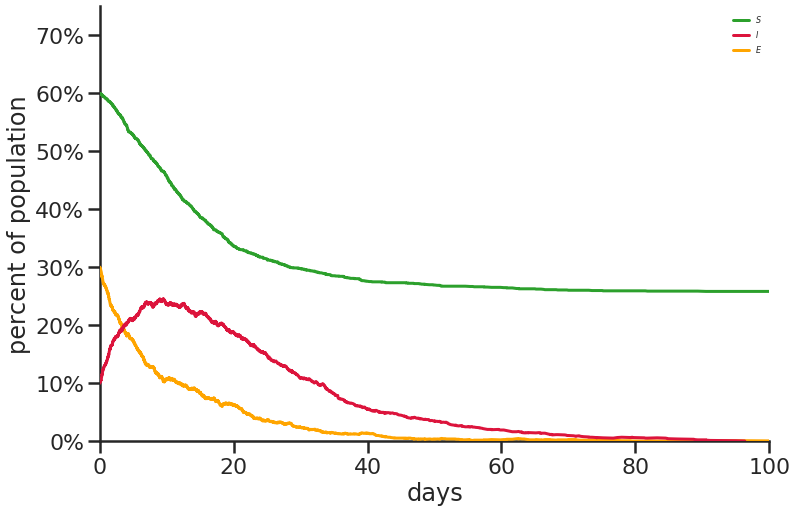

t = 0.01
t = 10.01
t = 20.02
t = 30.02
t = 40.01
t = 50.14
t = 60.02
t = 90.48


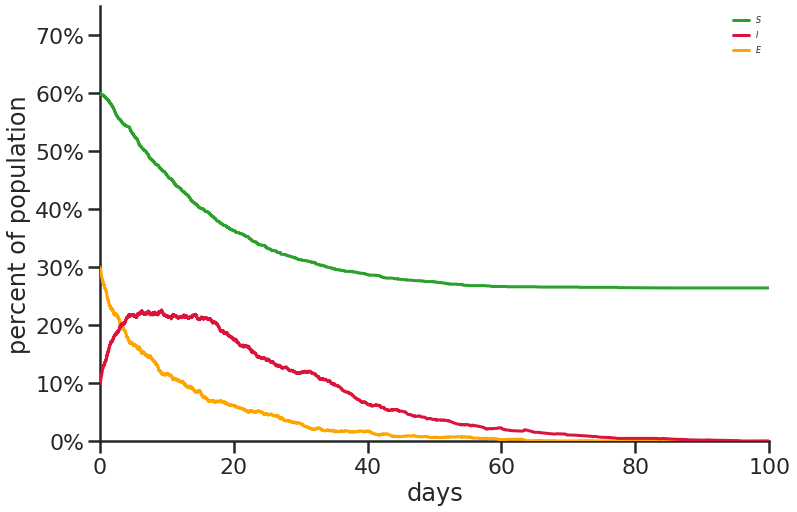

t = 0.00
t = 10.00
t = 20.01
t = 30.10
t = 40.01
t = 50.00
t = 60.09
t = 70.24
t = 80.34
t = 90.99
t = 100.22


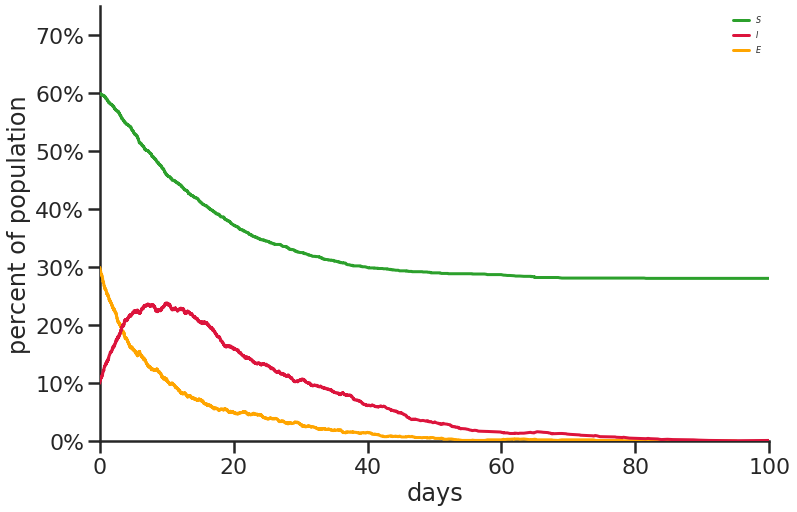

t = 0.00
t = 10.00
t = 20.02
t = 30.07
t = 40.01
t = 50.17
t = 60.02
t = 70.15
t = 80.18
t = 90.19
t = 100.22


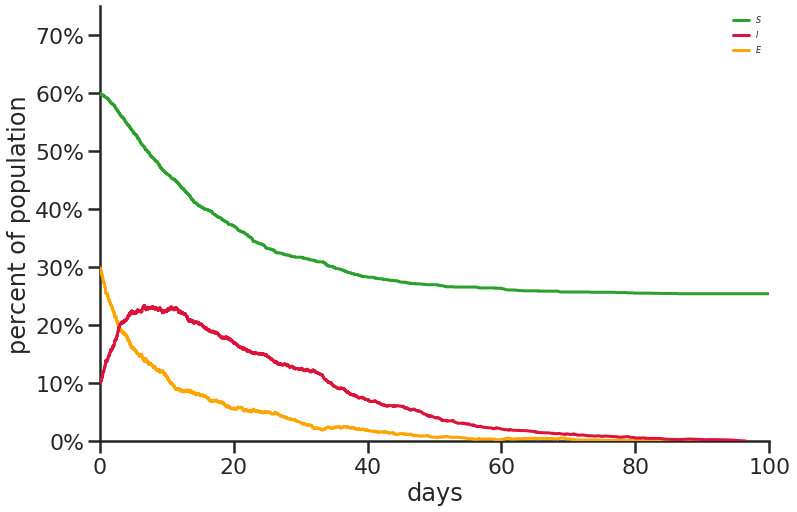

t = 0.00
t = 10.01
t = 20.01
t = 30.05
t = 40.04
t = 50.05
t = 60.22
t = 70.15
t = 80.48


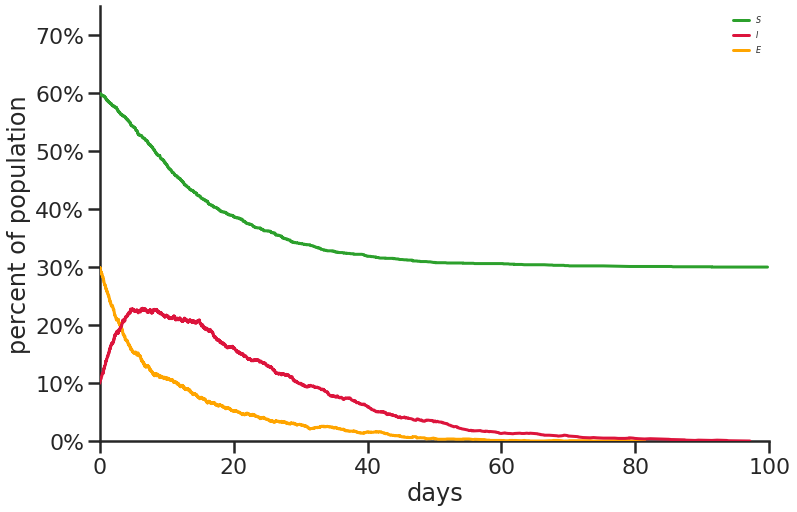

In [7]:
res=[]
for graph in graph_list:
    y,x,tot,tplval,npl, mean, stdev,count,lday = ipfnB(graph,2000,0.3,0.1)
    res.append([y,x,tot,tplval,npl, mean, stdev,count,lday])